<a href="https://colab.research.google.com/github/shazaelmorsh/Machine-Learning-Concepts/blob/main/Supervised_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Libraries
We will import numpy for computing and Matplotlib for plotting data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# plt.style.use() TO-DO

Create one dimensional arrays to plot

In [3]:
x_train = np.array([1,2])
y_train = np.array([300,500])
print(f'x_train = {x_train}')
print(f'x_train = {y_train}')

# check number of examples
print(f'Number of training examples are {x_train.shape[0]}')

x_train = [1 2]
x_train = [300 500]
Number of training examples are 2


Plotting the data

Text(0, 0.5, 'price of the house')

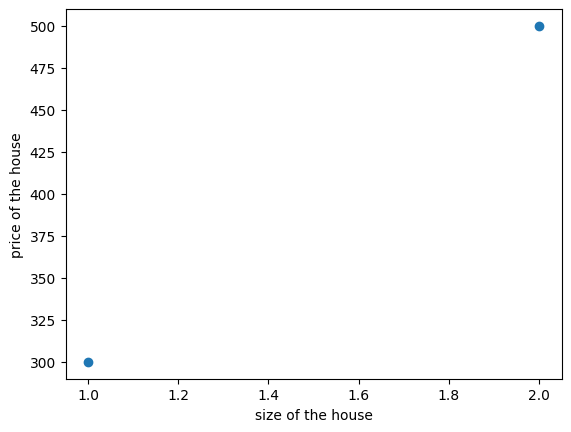

In [5]:
#plot the data points
plt.scatter(x_train,y_train)
plt.xlabel("size of the house")
plt.ylabel("price of the house")

# Linear Regression

Linear Regression Function : $$ f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{1}$$

In [12]:
#initialize w and b with random values
w = 100
b = 100
def compute_linear_model(x,w,b):
  f_wb = np.zeros(x.shape[0])
  #looping over training examples
  for i in range(f_wb.shape[0]):
    f_wb[i] = w * x[i] + b
  return f_wb

y_prediction = compute_linear_model(x_train,w,b)

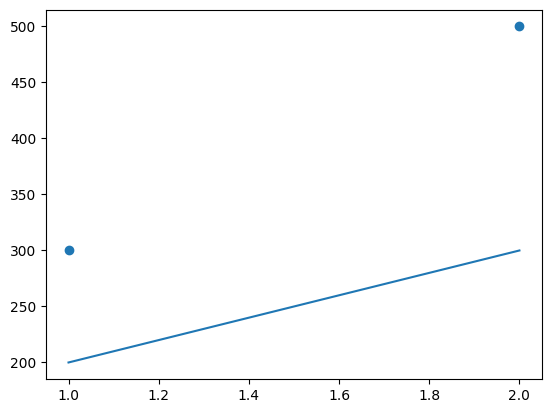

In [15]:
plt.plot(x_train,y_prediction, label = "our prediction")
plt.scatter(x_train,y_train, label = "actual value")

# Cost Function

The equation for cost with one variable is:
  $$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2 \tag{1}$$

where
  $$f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{2}$$

In [18]:
def compute_cost(x,y,w,b):
  cost_sum = 0
  y_prediction = compute_model_output(x,w,b)
  for i in range(x.shape[0]):
    cost_sum = cost_sum + (y_prediction[i] - y[i])**2
  cost_sum = cost_sum / 2*x.shape[0]
  return cost_sum

print("Cost is equal ",compute_cost(x_train,y_train,200,100))

Cost is equal  0.0


# Gradient Descent


$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline
\;  w &= w -  \alpha \frac{\partial J(w,b)}{\partial w} \tag{3}  \; \newline
 b &= b -  \alpha \frac{\partial J(w,b)}{\partial b}  \newline \rbrace
\end{align*}$$
where, parameters $w$, $b$ are updated simultaneously.  
The gradient is defined as:
$$
\begin{align}
\frac{\partial J(w,b)}{\partial w}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})x^{(i)} \tag{4}\\
  \frac{\partial J(w,b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)}) \tag{5}\\
\end{align}
$$

In [24]:
#Gradient
def compute_gradient(x,y,w,b):
  m = x.shape[0]
  dj_dw = 0
  dj_db = 0
  y_prediction = compute_model_output(x,w,b)
  for i in range(m):
    dj_dw = (y_prediction[i] - y[i]) * x[i]
    dj_db = (y_prediction[i] - y[i])
  dj_dw = dj_dw / m
  dj_db = dj_db / m
  return dj_dw , dj_db

#Gradient Descent
def gradient_descent(x,y,w,b,alpha,num_iter, cost_function = compute_cost, gradient_function = compute_gradient):
  p_history = []
  j_history = []
  for i in range(num_iter):
    dj_dw , dj_db = gradient_function(x,y,w,b)
    w = w - alpha * dj_dw
    b = b - alpha * dj_db
    if i < 100000:
      j_history.append(cost_function(x,y,w,b))
      p_history.append({w,b})
  return w,b, j_history, p_history


In [25]:
# initialize parameters
w_init = 0
b_init = 0
# some gradient descent settings
iterations = 10000
tmp_alpha = 1.0e-2
# run gradient descent
w_final, b_final, J_hist, p_hist = gradient_descent(x_train ,y_train, w_init, b_init, tmp_alpha,
                                                    iterations, compute_cost, compute_gradient)
print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")

(w,b) found by gradient descent: (200.0000,100.0000)


# Vectorization

moving on having more than 1 feature where we will need to make use of vectorization

In [35]:
#observing the change when creating more than 1-D array
arr = np.array([1, 2])
print(arr.shape)
print(arr.shape[0])
arr = np.array([[1, 2],[3,4],[2,4]])
print(arr.shape)
print(arr.shape[0])
#shape is rows x columns when dimension is 1D and columns x rows if otherwise

(2,)
2
(3, 2)
3


In [34]:
x_train = np.array([[2104, 5, 1, 45], [1416, 3, 2, 40], [852, 2, 1, 35]])
y_train = np.array([460, 232, 178])
print(x_train.shape)
print(x_train)
print(y_train.shape)
print(y_train)

(3, 4)
[[2104    5    1   45]
 [1416    3    2   40]
 [ 852    2    1   35]]
(3,)
[460 232 178]


# Linear Regression Model with more than 1 feature

$$ f_{\mathbf{w},b}(\mathbf{x}) =  w_0x_0 + w_1x_1 +... + w_{n-1}x_{n-1} + b \tag{1}$$
or in vector notation:
$$ f_{\mathbf{w},b}(\mathbf{x}) = \mathbf{w} \cdot \mathbf{x} + b  \tag{2} $$
where $\cdot$ is a vector `dot product`

In [44]:
b_init = 785.1811367994083
w_init = np.array([ 0.39133535, 18.75376741, -53.36032453, -26.42131618])
x_train = np.array([[2104, 5, 1, 45], [1416, 3, 2, 40], [852, 2, 1, 35]])
y_train = np.array([460, 232, 178])
def compute_linear_model_multiple_features(x,w,b):
  f_wb = np.zeros(x.shape[0])
  #looping over training examples
  for i in range(x.shape[0]):
    f_wb[i] = np.dot(x[i] , w) + b
  return f_wb

print(compute_linear_model_multiple_features(x_train,w_init,b_init))

[459.99999762 231.99999837 177.99999899]


# Cost function with more than 1 feature

The equation for the cost function with multiple variables $J(\mathbf{w},b)$ is:
$$J(\mathbf{w},b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})^2 \tag{3}$$
where:
$$ f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = \mathbf{w} \cdot \mathbf{x}^{(i)} + b  \tag{4} $$


In [49]:
def compute_cost_multiple_features(x,y,w,b):
  m = x.shape[0]
  y_pred = compute_linear_model_multiple_features(x,w,b)
  cost = 0
  for i in range(m):
    cost = cost + (y_pred[i] - y[i])**2
  cost = cost/ (2 * m)
  return cost

In [50]:
#testing my functions
cost = compute_cost_multiple_features(x_train, y_train, w_init, b_init)
print(f'Cost at optimal w : {cost}')

Cost at optimal w : 1.5578904428966628e-12


# Gradient descent with more than 1 feature

Gradient descent for multiple variables:

$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline\;
& w_j = w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j} \tag{5}  \; & \text{for j = 0..n-1}\newline
&b\ \ = b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b}  \newline \rbrace
\end{align*}$$

where, n is the number of features, parameters $w_j$,  $b$, are updated simultaneously and where  

$$
\begin{align}
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})x_{j}^{(i)} \tag{6}  \\
\frac{\partial J(\mathbf{w},b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)}) \tag{7}
\end{align}
$$
* m is the number of training examples in the data set

    
*  $f_{\mathbf{w},b}(\mathbf{x}^{(i)})$ is the model's prediction, while $y^{(i)}$ is the target value

In [56]:
#Gradient
def compute_gradient_multiple_features(x,y,w,b):
  y_pred = compute_linear_model_multiple_features(x,w,b)
  m = x.shape[0]
  dj_dw = 0
  dj_db = 0
  for i in range(m):
    dj_dw = dj_dw + (y_pred[i] - y[i]) * x[i]
    dj_db = dj_db + (y_pred[i] - y[i])
  dj_dw = dj_dw / m
  dj_db = dj_db / m
  return dj_dw , dj_db

#Gradient Descent
def gradient_descent_multiple_features(x,y,w,b,alpha,num_iter, cost_function = compute_cost_multiple_features, gradient_function = compute_gradient_multiple_features):
  j_history = []
  for i in range(num_iter):
    dj_dw , dj_db = gradient_function(x,y,w,b)
    w = w - alpha * dj_dw
    b = b - alpha * dj_db

    if i <10000:
      j_history.append(cost_function(x,y,w,b))
  return w,b,j_history


In [55]:
#Compute and display gradient
tmp_dj_db, tmp_dj_dw = compute_gradient_multiple_features(x_train, y_train, w_init, b_init)
print(f'dj_db at initial w,b: {tmp_dj_db}')
print(f'dj_dw at initial w,b: \n {tmp_dj_dw}')

dj_db at initial w,b: [-2.72623577e-03 -6.27197263e-06 -2.21745578e-06 -6.92403391e-05]
dj_dw at initial w,b: 
 -1.6739251501955248e-06


In [59]:
# initialize parameters
initial_w = np.zeros_like(w_init)
initial_b = 0.
# some gradient descent settings
iterations = 1000
alpha = 5.0e-7
# run gradient descent
w_final, b_final, J_hist = gradient_descent_multiple_features(x_train, y_train, initial_w, initial_b,
                                                    alpha, iterations)
print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} ")
m,_ = X_train.shape
for i in range(m):
    print(f"prediction: {np.dot(X_train[i], w_final) + b_final:0.2f}, target value: {y_train[i]}")

b,w found by gradient descent: -0.00,[ 0.20396569  0.00374919 -0.0112487  -0.0658614 ] 
prediction: 426.19, target value: 460
prediction: 286.17, target value: 232
prediction: 171.47, target value: 178
